In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


# Simple Logistic Regression using scikit-learn
for detailed walkthrough, please feel free to read the full articles "https://medium.com/p/86bf984f61f1"

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

df = pd.read_csv("../input/weather-dataset-rattle-package/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.describe()
df.shape

(145460, 23)

# Handle Missing Values

In [4]:
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values 
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

               count  percentage
Date               0         0.0
Location           0         0.0
MinTemp         1485         1.0
MaxTemp         1261         0.9
Rainfall        3261         2.2
Evaporation    62790        43.2
Sunshine       69835        48.0
WindGustDir    10326         7.1
WindGustSpeed  10263         7.1
WindDir9am     10566         7.3
WindDir3pm      4228         2.9
WindSpeed9am    1767         1.2
WindSpeed3pm    3062         2.1
Humidity9am     2654         1.8
Humidity3pm     4507         3.1
Pressure9am    15065        10.4
Pressure3pm    15028        10.3
Cloud9am       55888        38.4
Cloud3pm       59358        40.8
Temp9am         1767         1.2
Temp3pm         3609         2.5
RainToday       3261         2.2
RainTomorrow    3267         2.2


In [5]:
# drop columns with a large of amount missing values
df = df.drop(['Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am'], axis=1)

# drop rows with missing labels - RainTomorrow
df = df.dropna(subset = ["RainTomorrow"])

In [6]:
df.shape

(142193, 19)

In [7]:
num_list = []
cat_list = []

for column in df:
    if column != 'RainTomorrow': # separate lable
        if is_numeric_dtype(df[column]):
            num_list.append(column)
        elif is_string_dtype(df[column]):
            cat_list.append(column)


print(num_list)
print(cat_list)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [8]:
# Numerical Variables: impute missing values with mean
df.fillna(df.mean(), inplace=True)

In [9]:
# Categorical Variables: replace missing values with "Unknown"
for i in (cat_list):
    if df[i].isnull().any():
        df[i].fillna("Unknown", inplace=True)

In [10]:
df.describe(include = 'all')

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,142193,142193,142193.000000,142193.000000,142193.000000,142193,142193.000000,142193,142193,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193,142193
unique,3436,49,NaN,NaN,NaN,17,NaN,17,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2
top,2016-05-02,Canberra,NaN,NaN,NaN,W,NaN,N,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3418,NaN,NaN,NaN,9780,NaN,11393,10663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332,110316
mean,NaN,NaN,12.186400,23.226784,2.349974,NaN,39.984292,NaN,NaN,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235,NaN,NaN
std,NaN,NaN,6.388924,7.109554,8.423217,NaN,13.138385,NaN,NaN,8.851082,8.721551,18.932077,20.532065,6.746248,6.681788,6.472166,6.870771,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,NaN,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,NaN,31.000000,NaN,NaN,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000,NaN,NaN
50%,NaN,NaN,12.000000,22.700000,0.000000,NaN,39.000000,NaN,NaN,13.000000,18.637576,70.000000,51.482606,1017.653758,1015.258204,16.800000,21.300000,NaN,NaN
75%,NaN,NaN,16.800000,28.200000,0.800000,NaN,46.000000,NaN,NaN,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.300000,NaN,NaN


# Feature Engineering & EDA
* exploratory data analysis
* handle outliers
* date manipulation
* encoding categorical data

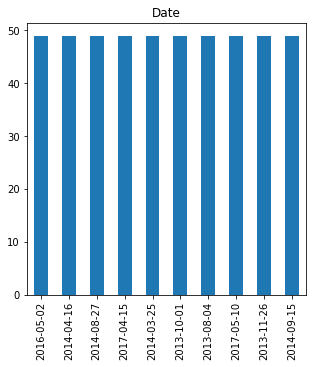

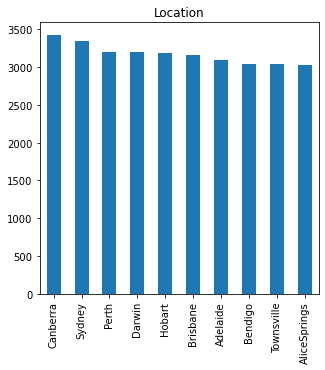

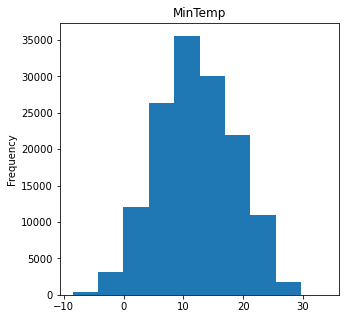

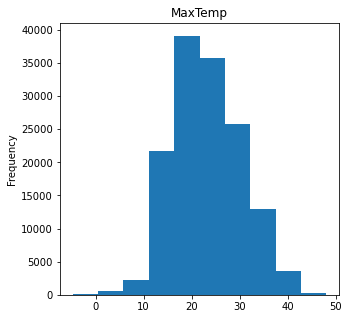

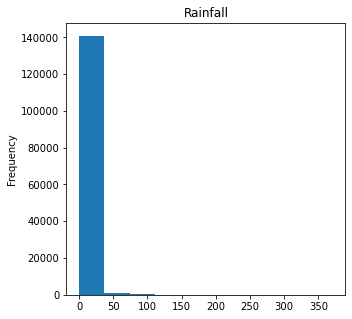

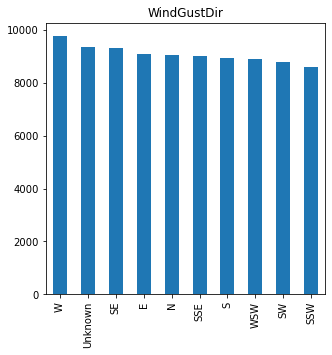

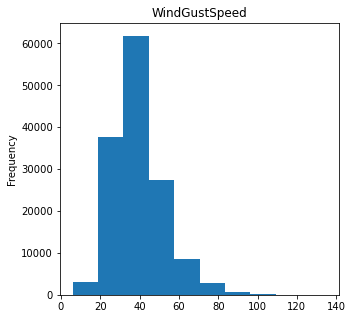

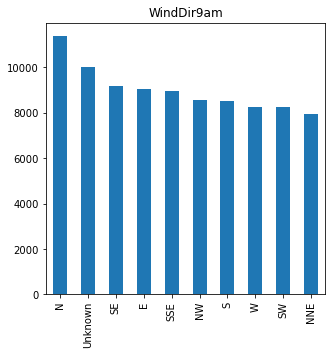

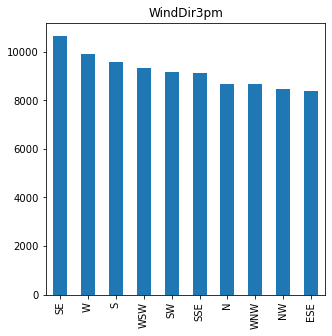

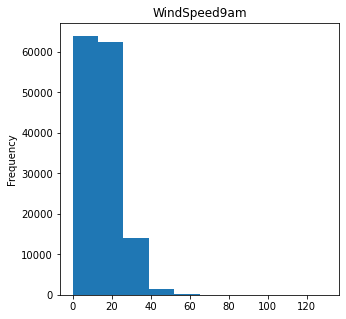

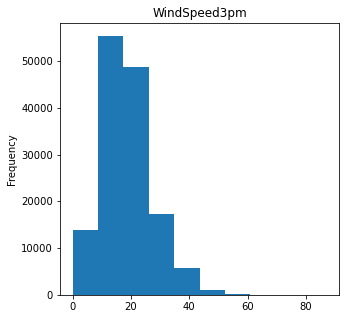

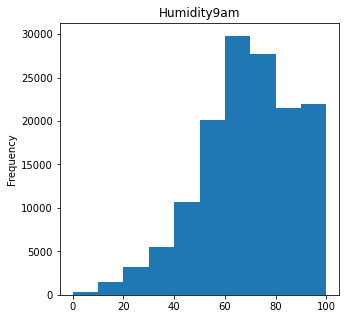

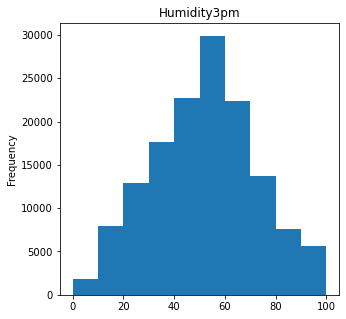

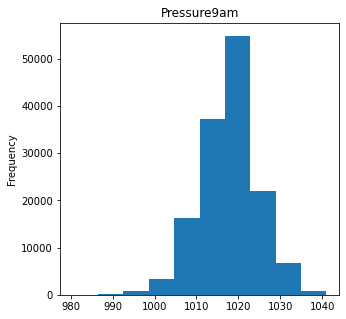

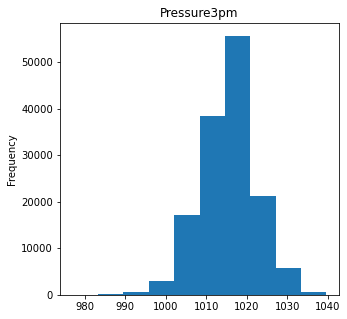

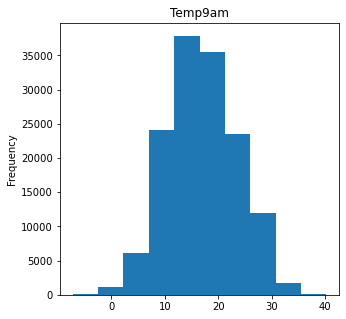

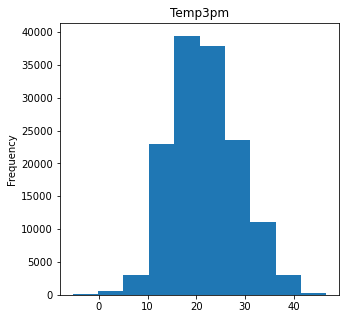

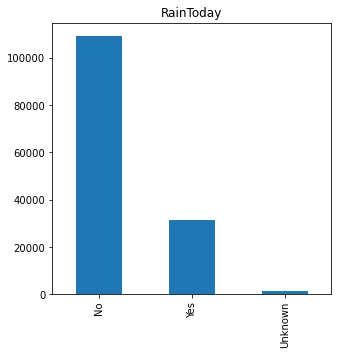

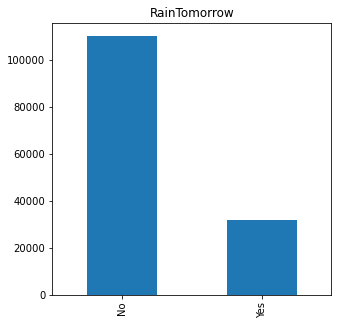

In [11]:
for column in df:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
    elif is_string_dtype(df[column]):
        # show only the TOP 10 value count in each categorical data
        df[column].value_counts()[:10].plot(kind = 'bar')

(127798, 19)

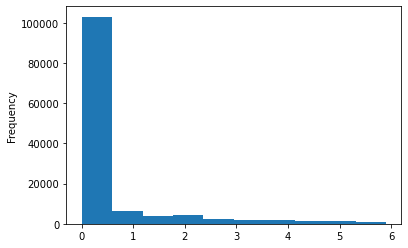

In [12]:
# address outliers in "Rainfall"
maximum = df['Rainfall'].quantile(0.9)
df = df[df["Rainfall"] < maximum]
df["Rainfall"].plot(kind = 'hist')
df.shape

<AxesSubplot:>

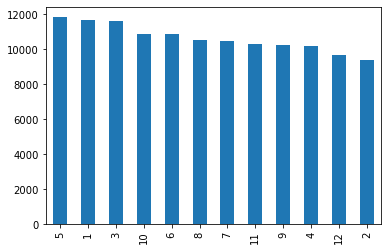

In [13]:
# date manipulation
df['Month'] = pd.to_datetime(df['Date']).dt.month.apply(str)
df['Month'].value_counts().plot(kind = 'bar')

In [14]:
# encoding categorical data using dummies
from sklearn.preprocessing import LabelEncoder

categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Month', 'RainTomorrow']

for i in categorical_features:
    df[i] = LabelEncoder().fit_transform(df[i])

<AxesSubplot:>

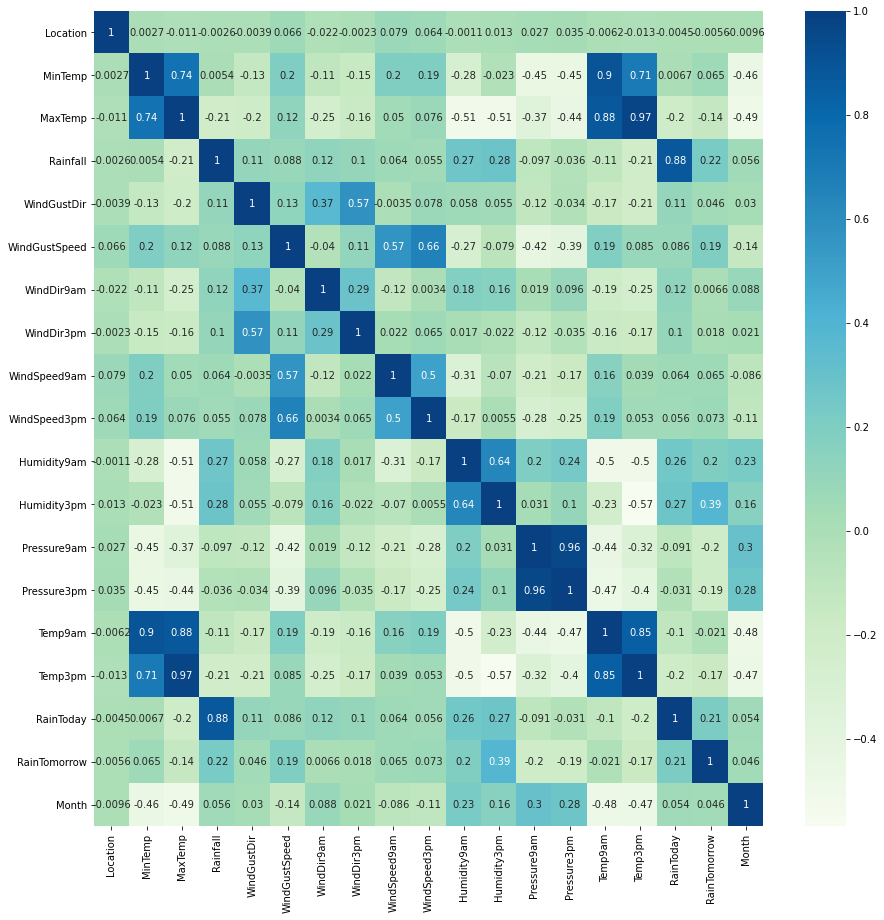

In [15]:
# multivariate analysis
plt.figure(1, figsize = (15,15))
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)

In [16]:
# select and rearrange columns
df = df[['Month','Location', 'MinTemp','MaxTemp', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 
         'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'RainToday', 'RainTomorrow']]

# Split Data

In [17]:
# X - input features matrix: select all rows using ":" and select all columns before the last one using":-1"
X = df.iloc[:,:-1]

# y - output target vector: select all rows using ":" and select the last column using "-1"
y = df["RainTomorrow"]

In [18]:
# split into train and test set
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(85624, 14) (42174, 14) (85624,) (42174,)


# Model Building

In [19]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter = 300)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Model Evaluation

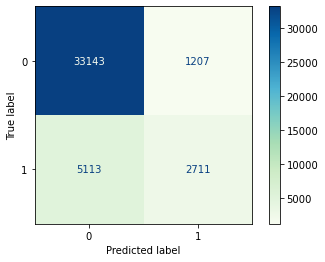

In [20]:
from sklearn import metrics

# confusion matrix
confusion_matrix = metrics.plot_confusion_matrix(reg, X_test, y_test, cmap = "GnBu")
print(confusion_matrix)

In [21]:
# accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8501446388770333


AUC: 0.82


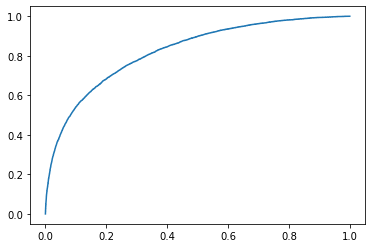

In [22]:
# ROC curve and AUC
y_pred_proba = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC:", round(auc,2))